<a href="https://colab.research.google.com/github/oladimeji-kazeem/ITNPAI1/blob/master/Practical_10_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokyo Olympics 2020 Twitter Sentiment Analysis 

In [ ]:
import pandas as pd
import numpy as np
import html
import re
import string

from pandas import Series, DataFrame

#data Visualization.
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Do this step if the word cloud is not installed
!pip3 install wordcloud 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud
import warnings # to ignore warnings.
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [ ]:
#NLTK data Pre-processing.
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import re # regular expression.
import string
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Do this step if spacy is not installed
!pip3 install spacy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# spacy library for lemmatization
import spacy
from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import span

# If en_core_web_sm is issuing error, install en_core_web_sm through anaconda
import en_core_web_sm 
nlp = spacy.load("en_core_web_sm")

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Global Parameters
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# libraries for evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Data Pre-Processing.

In [ ]:
# removing duplicated by deleting all the re- tweets.
data.drop_duplicates(subset ="text", keep = False, inplace = True)
#The number of  rows and the columns in the data is checked.
print('The shape of the data is :',data.shape)

The shape of the data is : (19922, 13)


In [ ]:
# the data types are visulaised 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19922 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                19922 non-null  object 
 1   text              19922 non-null  object 
 2   user_screen_name  19922 non-null  object 
 3   user_location     14197 non-null  object 
 4   retweet_count     19922 non-null  object 
 5   favorited         19922 non-null  object 
 6   favorite_count    19922 non-null  object 
 7   user_description  18011 non-null  object 
 8   user_created_at   19922 non-null  object 
 9   user_followers    19922 non-null  float64
 10  user_friends      19922 non-null  object 
 11  date              19922 non-null  object 
 12  language          19922 non-null  object 
dtypes: float64(1), object(12)
memory usage: 2.1+ MB


In [ ]:
# checking for null values. 
data.isnull().sum()

id                     0
text                   0
user_screen_name       0
user_location       5725
retweet_count          0
favorited              0
favorite_count         0
user_description    1911
user_created_at        0
user_followers         0
user_friends           0
date                   0
language               0
dtype: int64

In [ ]:
nltk.download('vader_lexicon')
# using Vader lexicon to labell the data.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sa= SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# the polarity scores for the text is calculated and assigned. 
data['scores'] = data['text'].apply(lambda text: sa.polarity_scores(text))
data.head(5)

,id,text,user_screen_name,user_location,retweet_count,favorited,favorite_count,user_description,user_created_at,user_followers,user_friends,date,language,scores
0,1419334065375924227,Rejected sports for the 2020 Olympics include ...,tbelmontedu,New Jersey,0,False,0,High School Language Arts Teacher. Technology ...,2013-01-21 00:03:31,778.0,661,2021-07-25 16:29:45,en,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp..."
1,1419334059424043009,Why is the Team USA men basketball team playin...,silverchasm,"Lynwood, CA",0,False,0,bleh,2014-05-13 18:54:40,66.0,553,2021-07-25 16:29:44,en,"{'neg': 0.144, 'neu': 0.799, 'pos': 0.058, 'co..."
2,1419334056161030146,@my_hive_away I'm watching kayaking on the Oly...,cshaw12897514,NaN,0,False,0,"not much to say, not very interesting. but I'm...",2020-10-19 14:15:06,494.0,757,2021-07-25 16:29:43,en,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp..."
3,1419334052876795905,While girls her age are still trying to figuri...,AdultMediaTV,United States,0,False,0,Design | Photography | Film 18+ Test ready\nIn...,2015-08-18 22:33:39,19.0,3,2021-07-25 16:29:42,en,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,1419334052180594699,@omensfromeden patty mills is at the Olympics???,muddyfoxglove,hozier.tamino.florence.etc.,0,False,0,what if i was a bog body and you were a bog bo...,2016-11-20 06:02:11,1153.0,622,2021-07-25 16:29:42,en,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
# the scores are classified and assigned to positive, negative and neutral sentiments. 
data['compound'] = data['scores'].apply(lambda score_dict: score_dict['compound'])
data['sentiment']=''
data.loc[data.compound>0,'sentiment'] = 'POSITIVE'
data.loc[data.compound==0,'sentiment'] = 'NEUTRAL'
data.loc[data.compound<0,'sentiment'] = 'NEGATIVE'


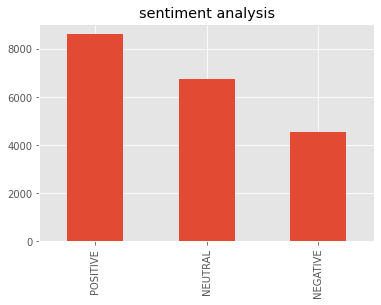

In [ ]:
# Bar plot to see the distribition of sentiments. 
data.sentiment.value_counts().plot(kind='bar',title="sentiment analysis")

In [ ]:
#Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation)) # to remove punctuations
    text = re.sub(r'[0-9]+', '',text)
    return text

In [ ]:
# Applying the clean text function on the data set
data["clean_text"] = data.text.apply(clean_text)

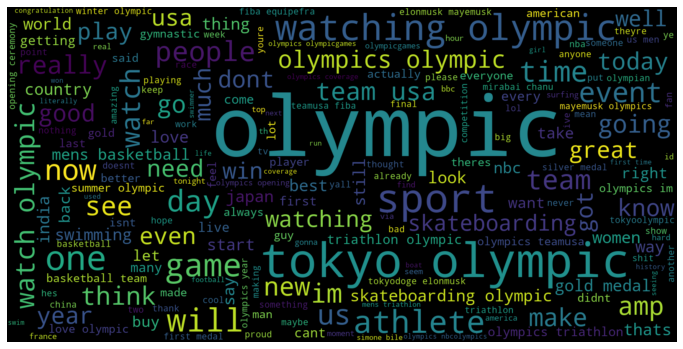

In [ ]:
#visualising the data before further pre-processing using word cloud. 
from wordcloud import WordCloud
stop_words = set(stopwords.words('english')+list(string.punctuation))
final_string = " ".join(data.clean_text)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(final_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# showing the top three cleansed twitter data.
data.clean_text.head(3)

0    rejected sports for the  olympics include bowl...
1    why is the team usa men basketball team playin...
2    myhiveaway im watching kayaking on the olympic...
Name: clean_text, dtype: object

In [ ]:
# function for tokenising. 
def token(string):    
    tokenized = word_tokenize(string)
    filtered_sentence = [word for word in tokenized if not word in stop_words]
    return ' '.join(c for c in filtered_sentence)

In [ ]:
# applying the tokenization function on the tweets.
data['clean_text'] = data.apply(lambda row: token(row['clean_text']), axis=1)

In [ ]:
# lemmatazation function to pre -process the data
def spacy_lemmatization(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [ ]:
# applying the lemmatization function. 
data['clean_text'] = data.apply(lambda row: spacy_lemmatization(row['clean_text']), axis=1)

In [ ]:
data.head()

,id,text,user_screen_name,user_location,retweet_count,favorited,favorite_count,user_description,user_created_at,user_followers,user_friends,date,language,scores,compound,sentiment,clean_text
0,1419334065375924227,Rejected sports for the 2020 Olympics include ...,tbelmontedu,New Jersey,0,False,0,High School Language Arts Teacher. Technology ...,2013-01-21 00:03:31,778.0,661,2021-07-25 16:29:45,en,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",-0.8020,NEGATIVE,reject sport olympic include bowl chess tug war
1,1419334059424043009,Why is the Team USA men basketball team playin...,silverchasm,"Lynwood, CA",0,False,0,bleh,2014-05-13 18:54:40,66.0,553,2021-07-25 16:29:44,en,"{'neg': 0.144, 'neu': 0.799, 'pos': 0.058, 'co...",-0.5706,NEGATIVE,team usa man basketball team play horrible oly...
2,1419334056161030146,@my_hive_away I'm watching kayaking on the Oly...,cshaw12897514,NaN,0,False,0,"not much to say, not very interesting. but I'm...",2020-10-19 14:15:06,494.0,757,2021-07-25 16:29:43,en,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp...",0.7257,POSITIVE,myhiveaway i be watch kayak olympics broadcast...
3,1419334052876795905,While girls her age are still trying to figuri...,AdultMediaTV,United States,0,False,0,Design | Photography | Film 18+ Test ready\nIn...,2015-08-18 22:33:39,19.0,3,2021-07-25 16:29:42,en,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,girl age still try figure open account onlyfan...
4,1419334052180594699,@omensfromeden patty mills is at the Olympics???,muddyfoxglove,hozier.tamino.florence.etc.,0,False,0,what if i was a bog body and you were a bog bo...,2016-11-20 06:02:11,1153.0,622,2021-07-25 16:29:42,en,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL,omensfromeden patty mills olympics


In [ ]:
#removing the white spaces 
data['clean_text'] = data['clean_text'].str.strip()
data['clean_text'] = data['clean_text'].map(lambda x: " ".join(x.split()))

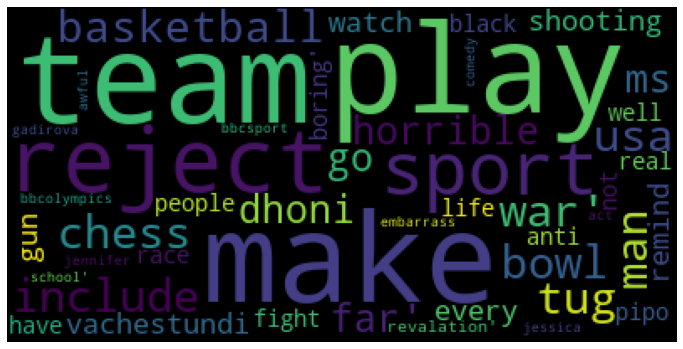

In [ ]:
# word cloud for negative sentiments.In this technique much information cannot be inferred compared to the other visualisation technique.
data3 = data[data.sentiment=='NEGATIVE']
plt.figure(figsize = (12,12))
words = ["tokyo","olympics","olympic"]
text = data3['clean_text'].values 
wc= WordCloud(relative_scaling=0.5,stopwords=words).generate(str(text))
plt.imshow(wc)
plt.axis("off")
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

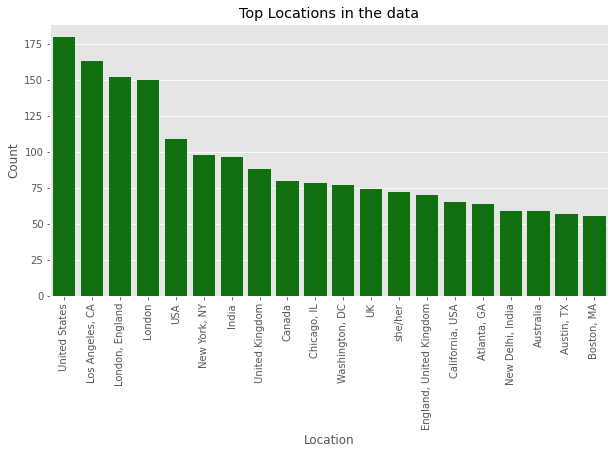

In [ ]:
# visualising the user location using bar plot
y = data.user_location.value_counts()[:20]
plt.figure(figsize=(10,5))
plt.title("Top Locations in the data")
sns.barplot(y.index, y, color="Green")
plt.ylabel("Count")
plt.xlabel("Location")
plt.xticks(rotation=90)

In [ ]:
# replacing all the city names with their country name to find where the tweets came from.
data['user_location'] = data['user_location'].replace({'Mumbai, India':'india','New Delhi, India':'india','London, England':'UK',
                                                       'London':'UK','England, United Kingdom':'UK','United Kingdom':'UK','Ireland':'UK',
                                                     'United States':'USA','Los Angeles, CA':'USA','New York, NY':'USA',
                                                      'Washington, DC':'USA','Chicago, IL':'USA','Toronto, Ontario':'Canada','Melbourne, Victoria':'Australia',
                                                     'Sydney, New South Wales': 'Australia','India':'india','Lagos, Nigeria':'South Africa', 'Jamaica':'South Africa',
                                                    'Nigeria':'South Africa','Nairobi, Kenya': 'South Africa','Melbourne, Australia':'Australia', 'Sydney, Australia' :'Australia',
                                                      'Bengaluru, India':'india','New Delhi':'india','London, UK':'UK', 'Johannesburg, South Africa':'South Africa',
                                                      'New York':'USA', 'Sydney':'Australia','Hyderabad, India':'india','Florida, USA':'USA','California, USA':'USA','New York, USA':'USA'
                                                      })

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

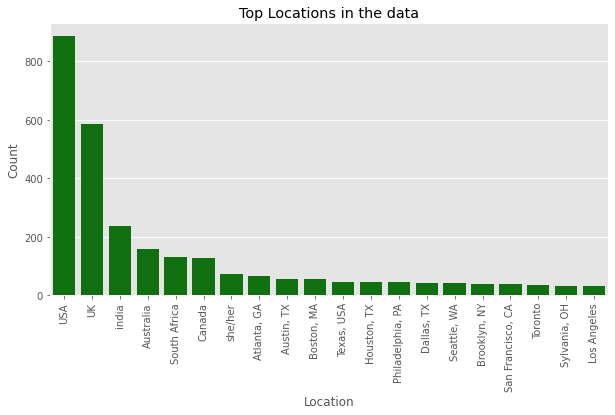

In [ ]:
# visualising the yuser location after replacing the city name with country names.
y = data.user_location.value_counts()[:20]
plt.figure(figsize=(10,5))
plt.title("Top Locations in the data")
sns.barplot(y.index, y, color="Green")
plt.ylabel("Count")
plt.xlabel("Location")
plt.xticks(rotation=90)

In [ ]:
# converting all the text into lowercase
data.sentiment= data.sentiment.str.lower()

In [ ]:
# displaying all the columns names
data.columns

Index(['id', 'text', 'user_screen_name', 'user_location', 'retweet_count',
       'favorited', 'favorite_count', 'user_description', 'user_created_at',
       'user_followers', 'user_friends', 'date', 'language', 'scores',
       'compound', 'sentiment', 'clean_text'],
      dtype='object')

In [ ]:
# dropping all but required columns and assigning it to a variable name called df. 
df = data.drop(['id', 'user_screen_name', 'user_location', 'retweet_count',
       'favorited', 'favorite_count', 'user_description', 'user_created_at',
       'user_followers', 'user_friends', 'date', 'language'],axis=1)

In [ ]:
# displaying the head.
df.head(3)

,text,scores,compound,sentiment,clean_text
0,Rejected sports for the 2020 Olympics include ...,"{'neg': 0.375, 'neu': 0.625, 'pos': 0.0, 'comp...",-0.8020,negative,reject sport olympic include bowl chess tug war
1,Why is the Team USA men basketball team playin...,"{'neg': 0.144, 'neu': 0.799, 'pos': 0.058, 'co...",-0.5706,negative,team usa man basketball team play horrible oly...
2,@my_hive_away I'm watching kayaking on the Oly...,"{'neg': 0.0, 'neu': 0.697, 'pos': 0.303, 'comp...",0.7257,positive,myhiveaway i be watch kayak olympics broadcast...


# Data modelling

In [ ]:
# assigning the tweets to vafriable named X.
X= df.clean_text
# assigning the target labels to a variable named y
y= df.sentiment

# Count Vectorise and TF-IDF Vectoriser

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
bow=CountVectorizer( min_df=2, max_features=1000)
bow.fit(X)
bow_df=bow.transform(X).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer( min_df=2, max_features=1000)
tfidf.fit(X)
tfidf_df=bow.transform(X).toarray()

# Splitting the Train and Test Data 70% train and 30% test

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(tfidf_df,y,test_size=0.3)

# Splitting the train and validation set

In [ ]:
# 70% training set and 30% test set.
x_train,x_val,y_train,y_val = train_test_split(X_train,Y_train,test_size=0.3)

# Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(x_train,y_train)

print("train  accuracy : ",model.score(x_train,y_train))
print("val accuracy : ",model .score(x_val,y_val))
print("test accuracy   : ",model.score(X_test,Y_test))

y_pred=model.predict(X_test)

train  accuracy :  0.8297305603934023
val accuracy :  0.7810707456978967
test accuracy   :  0.7756399531537561


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.74      0.57      0.64      1391
     neutral       0.73      0.88      0.80      2046
    positive       0.84      0.81      0.82      2540

    accuracy                           0.78      5977
   macro avg       0.77      0.75      0.75      5977
weighted avg       0.78      0.78      0.77      5977



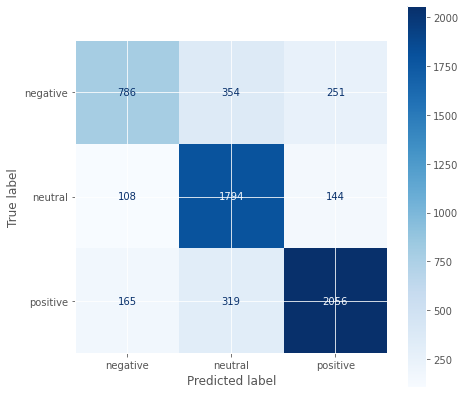

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(model, X_test, Y_test,ax=ax,cmap='Blues')  
plt.show()

# Multinomial Naive Bayes

In [ ]:
mnb =  MultinomialNB(alpha=0.3)
mnb.fit(x_train,y_train)

print("train: ",mnb.score(x_train,y_train))
print("val accuracy : ",mnb.score(x_val,y_val))
print("test : ",mnb.score(X_test,Y_test))

y_mpred = mnb.predict(X_test)

train:  0.7721544923675853
val accuracy :  0.7284894837476099
test :  0.7257821649657018


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_mpred))

              precision    recall  f1-score   support

    negative       0.65      0.57      0.61      1391
     neutral       0.73      0.76      0.74      2046
    positive       0.76      0.78      0.77      2540

    accuracy                           0.73      5977
   macro avg       0.71      0.70      0.71      5977
weighted avg       0.72      0.73      0.72      5977



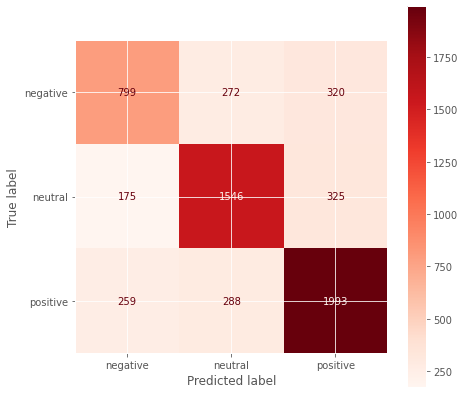

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(mnb, X_test, Y_test,ax=ax,cmap='Reds')  
plt.show()

# SVM Support Vector Machine Classifier

In [ ]:
from sklearn import svm
clf = svm.SVC(decision_function_shape = "ovr")# ovo
clf.fit(x_train,y_train)

print("train: ",clf.score(x_train,y_train))
print("val accuracy: ",clf.score(x_val,y_val))
print("test : ",clf.score(X_test,Y_test))

ysvcpred = clf.predict(X_test)

train:  0.8966294437045385
val accuracy:  0.767208413001912
test :  0.7528860632424293


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, ysvcpred))

              precision    recall  f1-score   support

    negative       0.80      0.44      0.57      1391
     neutral       0.69      0.88      0.78      2046
    positive       0.80      0.82      0.81      2540

    accuracy                           0.75      5977
   macro avg       0.77      0.71      0.72      5977
weighted avg       0.76      0.75      0.74      5977



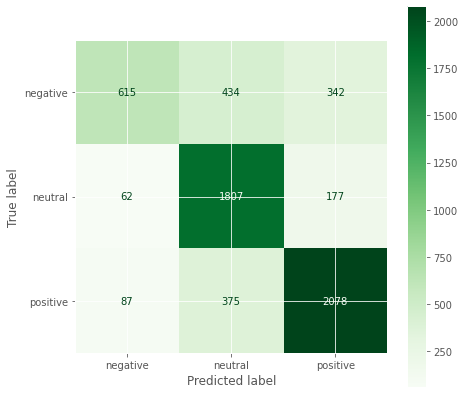

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(clf, X_test, Y_test,ax=ax,cmap='Greens')  
plt.show()

# Multilayer Perceptron

In [ ]:
mlp_model = MLPClassifier(activation='tanh', alpha = 0.01, hidden_layer_sizes = 5, solver = 'adam')
mlp = clf.fit(x_train, y_train)
print("train ",mlp.score(x_train,y_train))
print("val accuracy : ",model .score(x_val,y_val))
print("test: ",mlp.score(X_test,Y_test))
y_mlppred = clf.predict(X_test)

train  0.8966294437045385
val accuracy :  0.7810707456978967
test:  0.7528860632424293


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_mlppred))

              precision    recall  f1-score   support

    negative       0.80      0.44      0.57      1391
     neutral       0.69      0.88      0.78      2046
    positive       0.80      0.82      0.81      2540

    accuracy                           0.75      5977
   macro avg       0.77      0.71      0.72      5977
weighted avg       0.76      0.75      0.74      5977



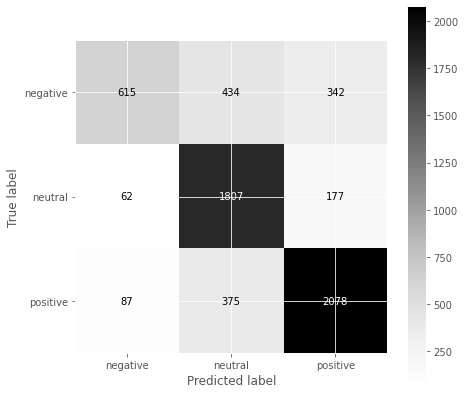

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(mlp, X_test, Y_test,ax=ax,cmap='Greys')  
plt.show()

In [ ]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 19.8 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from mlxtend.evaluate import bias_variance_decomp

In [ ]:
mse, bias, var = bias_variance_decomp(mnb, X_train, y_train, X_test, Y_test, num_rounds=200, loss='log_loss', random_seed=1)

print('Average expected loss: %.3f' % mse)
print('Average bias: %.3f' % bias)
print('Average variance: %.3f' % var)

TypeError: ignored